<Axes: >

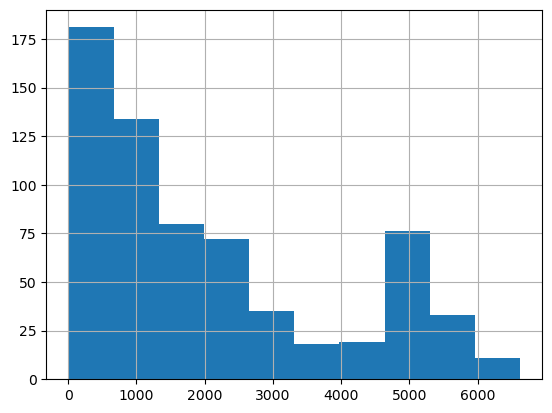

In [1]:
import os
os.chdir("/DeepenData/Repos/Flux_v0")
import warnings
warnings.filterwarnings("ignore")
import time
from data.mocks import planificacion_simulador

import releases.simv6_1 as sim


dataset = sim.DatasetTTP.desde_csv_atenciones("data/fonasa_monjitas.csv.gz")  # IdOficina=2)
un_dia = dataset.un_dia("2023-05-15").sort_values(by="FH_Emi", inplace=False)
skills = sim.obtener_skills(un_dia)
#########################
#---Ver tiempos de espera históricos---
#########################
un_dia.T_Esp.hist()

#planificacion = sim.plan_desde_skills(skills, inicio="08:00:00", porcentaje_actividad=1)


In [2]:

start_time = time.time()
hora_cierre = "15:30:00"
registros_atenciones, fila = sim.simv06(
                                        un_dia, hora_cierre, planificacion_simulador,  log_path = "dev/simulacion.log")
print(f"{len(registros_atenciones) = }, {len(fila) = }")
end_time = time.time()
print(f"tiempo total: {end_time - start_time:.1f} segundos")

registros_atenciones[registros_atenciones.espera != 0 ].sort_values('FH_Emi').head(10), registros_atenciones[registros_atenciones.espera != 0 ].sort_values('FH_Emi').tail(10)




In [ ]:
registros_atenciones.to_csv("data/simulacion_mock.csv")

In [ ]:


#########################
#---Ver tiempos de espera simulados---
#########################
registros_atenciones.espera.hist()

In [ ]:

import matplotlib.pyplot as plt
for porcentaje in [0.95, 0.75, 0.5]:
    for k in planificacion_simulador.keys():
        # Solo hay un bloque horario, por eso el [0]
        planificacion_simulador[k][0]['propiedades']['porcentaje_actividad'] = porcentaje
        
        
    registros_atenciones, _ = sim.simv06(
                                        un_dia, hora_cierre, planificacion_simulador)
    
    (registros_atenciones.espera / 60/60).plot(kind='density', alpha=0.7, label=f'{k} - {porcentaje*100}%', linewidth=4)
plt.legend()
plt.xlim(0, None)
plt.xlabel('Horas de espera')